In [2]:
import pandas as pd

In [3]:
# Cargar base de datos
df = pd.read_csv("data/data_clean.csv")

In [4]:
# Crear columna llamada Costo_Total_Utilizaciones con Cantidad_Utilizaciones * Costo_Unitario
df["Costo_Total_Utilizaciones"] = (
    df["Cantidad_Utilizaciones"] * df["Precio_Utilización"]
)

In [4]:
df

,Afiliado_Id,Fecha_Reclamacion,FECHA_INICIO,FECHA_FIN,Cantidad_Utilizaciones,Precio_Utilización,Diagnostico_Desc,Reclamacion_Desc,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Sexo,Regional_desc,Poliza_Id,Edad,Duración_Póliza_Rango,Días_en_reclamar,Costo_Total_Utilizaciones
0,2668445,2019-10-28,2019-09-01,2019-12-31,1.0,46500.0,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,0.0,0.0,0.0,1.0,0.0,F,REGIONAL OCCIDENTE,141480119.0,61.0,>= 3.5 Meses,57,46500.0
1,2668445,2019-10-01,2019-09-01,2019-12-31,1.0,55676.0,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,0.0,0.0,0.0,1.0,0.0,F,REGIONAL OCCIDENTE,141480119.0,61.0,>= 3.5 Meses,30,55676.0
2,2668445,2019-09-11,2019-09-01,2019-12-31,2.0,78926.0,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,0.0,0.0,0.0,1.0,0.0,F,REGIONAL OCCIDENTE,141480119.0,61.0,>= 3.5 Meses,10,157852.0
3,2668445,2019-09-20,2019-09-01,2019-12-31,6.0,12742.5,DIAGNÓSTICO PENDIENTE,LABORATORIO CLINICO,0.0,0.0,0.0,1.0,0.0,F,REGIONAL OCCIDENTE,141480119.0,61.0,>= 3.5 Meses,19,76455.0
4,4370072,2019-09-30,2019-09-01,2019-12-31,2.0,21204.0,DIAGNÓSTICO PENDIENTE,FISIOTERAPIA ILIMITADA,0.0,0.0,0.0,0.0,0.0,F,REGIONAL ANTIOQUIA,111025100.0,58.0,>= 3.5 Meses,29,42408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638062,15014053,2019-10-03,2019-09-01,2019-12-31,1.0,56916.0,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,0.0,0.0,0.0,0.0,0.0,M,REGIONAL OCCIDENTE,157659159.0,43.0,>= 3.5 Meses,32,56916.0
638063,42274571,2019-12-06,2019-11-06,2019-12-31,1.0,85312.0,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,0.0,0.0,0.0,0.0,0.0,F,REGIONAL NORTE,203160909.0,14.0,1.5-2.5 Meses,30,85312.0
638064,25921043,2019-09-24,2019-09-01,2019-12-31,1.0,2461.0,DIAGNÓSTICO PENDIENTE,CONSULTA DE URGENCIAS,0.0,0.0,0.0,0.0,0.0,M,REGIONAL OCCIDENTE,195289232.0,30.0,>= 3.5 Meses,23,2461.0
638065,54788170,2019-09-02,2019-09-01,2019-12-31,1.0,63364.0,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,0.0,0.0,0.0,0.0,0.0,M,REGIONAL OCCIDENTE,159472544.0,10.0,>= 3.5 Meses,1,63364.0


# Reclamación

In [26]:
# COSTO TOTAL POR RECLAMACION
# Agrupación por reclamación
precio_total_por_reclamacion = (
    df.groupby("Reclamacion_Desc")["Costo_Total_Utilizaciones"].sum().head(10)
)

# Datos por precio de forma descendente
precio_total_por_reclamacion_sorted = precio_total_por_reclamacion.sort_values(
    ascending=False
)

# Hacer lo de arriba pero en plotly
import plotly.express as px

fig = px.bar(
    x=precio_total_por_reclamacion_sorted.index,
    y=precio_total_por_reclamacion_sorted,
    title="Costo total por Reclamación",
    labels={"x": "Reclamación", "y": "Costo total"},
)
fig.update_layout(
    xaxis_tickangle=-9,
    yaxis=dict(
        title="Costo total",
        titlefont_size=16,
        tickfont_size=14,
    ),
)
fig.show()

In [30]:
# Agrupación por reclamación
cantidad_utilizaciones_por_reclamacion = (
    df.groupby("Reclamacion_Desc")["Cantidad_Utilizaciones"].sum().head(10)
)

# Datos por precio de forma descendente
cantidad_utilizaciones_por_reclamacion_sorted = (
    cantidad_utilizaciones_por_reclamacion.sort_values(ascending=False)
)

# Hacer lo de arriba pero en plotly
import plotly.express as px

fig = px.bar(
    x=cantidad_utilizaciones_por_reclamacion_sorted.index,
    y=cantidad_utilizaciones_por_reclamacion_sorted,
    title="Cantidad de utilizaciones por Reclamación",
    labels={"x": "Reclamación", "y": "Cantidad de utilizaciones"},
)

fig.update_layout(
    xaxis_tickangle=-9,
    yaxis=dict(
        title="Cantidad de utilizaciones",
        titlefont_size=16,
        tickfont_size=14,
    ),
)

fig.show()

In [41]:
# Agrupación por reclamación
cantidad_utilizaciones_por_reclamacion = (
    df.groupby("Reclamacion_Desc")["Días_en_reclamar"].mean().head(10)
)

# Datos por precio de forma descendente
cantidad_utilizaciones_por_reclamacion_sorted = (
    cantidad_utilizaciones_por_reclamacion.sort_values(ascending=False)
)

# Grafica
import plotly.express as px

fig = px.bar(
    x=cantidad_utilizaciones_por_reclamacion_sorted.index,
    y=cantidad_utilizaciones_por_reclamacion_sorted,
    title="Días en reclamar el seguro",
    labels={"x": "Reclamación", "y": "Días en reclamar"},
)

fig.update_layout(
    xaxis_tickangle=-9,
    yaxis=dict(
        title="Días en reclamar",
        titlefont_size=16,
        tickfont_size=14,
    ),
    bargap=0.5,  # Ajusta este valor según tus preferencias
)

fig.show()

# Regional

In [34]:
# Hacer un gráfico de barras con seasborn de costo total de utilizaciones vs regional_desc

import plotly.express as px

fig = px.bar(
    df.groupby(["Regional_desc"])
    .agg({"Costo_Total_Utilizaciones": "sum"})
    .sort_values("Costo_Total_Utilizaciones", ascending=False)
    .reset_index(),
    x="Regional_desc",
    y="Costo_Total_Utilizaciones",
    title="Costo total de utilizaciones por regional",
)
fig.show()

In [35]:
# Hacer un gráfico de barras con seasborn de costo total de utilizaciones vs regional_desc

import plotly.express as px

fig = px.bar(
    df.groupby(["Regional_desc"])
    .agg({"Cantidad_Utilizaciones": "sum"})
    .sort_values("Cantidad_Utilizaciones", ascending=False)
    .reset_index(),
    x="Regional_desc",
    y="Cantidad_Utilizaciones",
    title="Cantidad_Utilizaciones por regional",
)
fig.show()

# Afiliado

Costo promedio de los afiliados:  1173442.0
Cantidad promedio de utilizaciones de los afiliados:  7.0


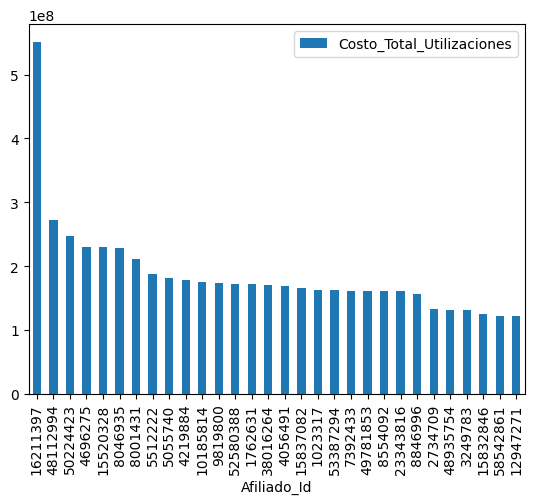

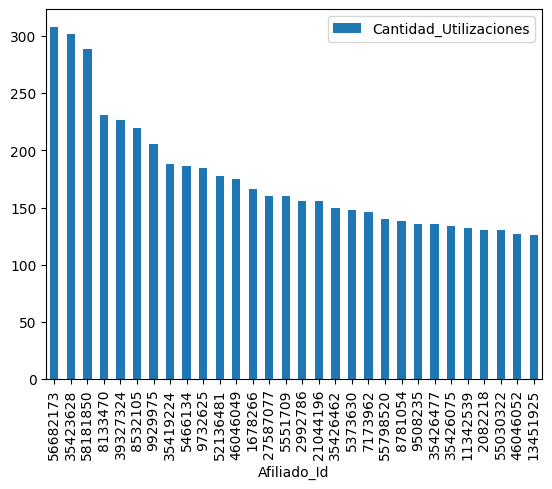

In [49]:
# Gráfica los 10 primeros
df.groupby(["Afiliado_Id"]).agg(
    {"Costo_Total_Utilizaciones": "sum"}
).reset_index().sort_values(by="Costo_Total_Utilizaciones", ascending=False).head(
    30
).plot.bar(
    x="Afiliado_Id", y="Costo_Total_Utilizaciones"
)

# Cual es el promedio de Costo_Total_Utilizaciones por Afiliado
Costo_Total_Utilizaciones_afiliado = (
    df.groupby(["Afiliado_Id"])
    .agg({"Costo_Total_Utilizaciones": "sum"})
    .reset_index()
    .sort_values(by="Costo_Total_Utilizaciones", ascending=False)
)

print(
    "Costo promedio de los afiliados: ",
    Costo_Total_Utilizaciones_afiliado["Costo_Total_Utilizaciones"].mean().round(0),
)


# Gráfica los 10 primeros
df.groupby(["Afiliado_Id"]).agg(
    {"Cantidad_Utilizaciones": "sum"}
).reset_index().sort_values(by="Cantidad_Utilizaciones", ascending=False).head(
    30
).plot.bar(
    x="Afiliado_Id", y="Cantidad_Utilizaciones"
)

# Cantidad de utilizaciones
Cantidad_Utilizaciones_afiliado = (
    df.groupby(["Afiliado_Id"])
    .agg({"Cantidad_Utilizaciones": "sum"})
    .reset_index()
    .sort_values(by="Cantidad_Utilizaciones", ascending=False)
)

print(
    "Cantidad promedio de utilizaciones de los afiliados: ",
    Cantidad_Utilizaciones_afiliado["Cantidad_Utilizaciones"].mean().round(0),
)

# Matriz de correlación y mapa de calor

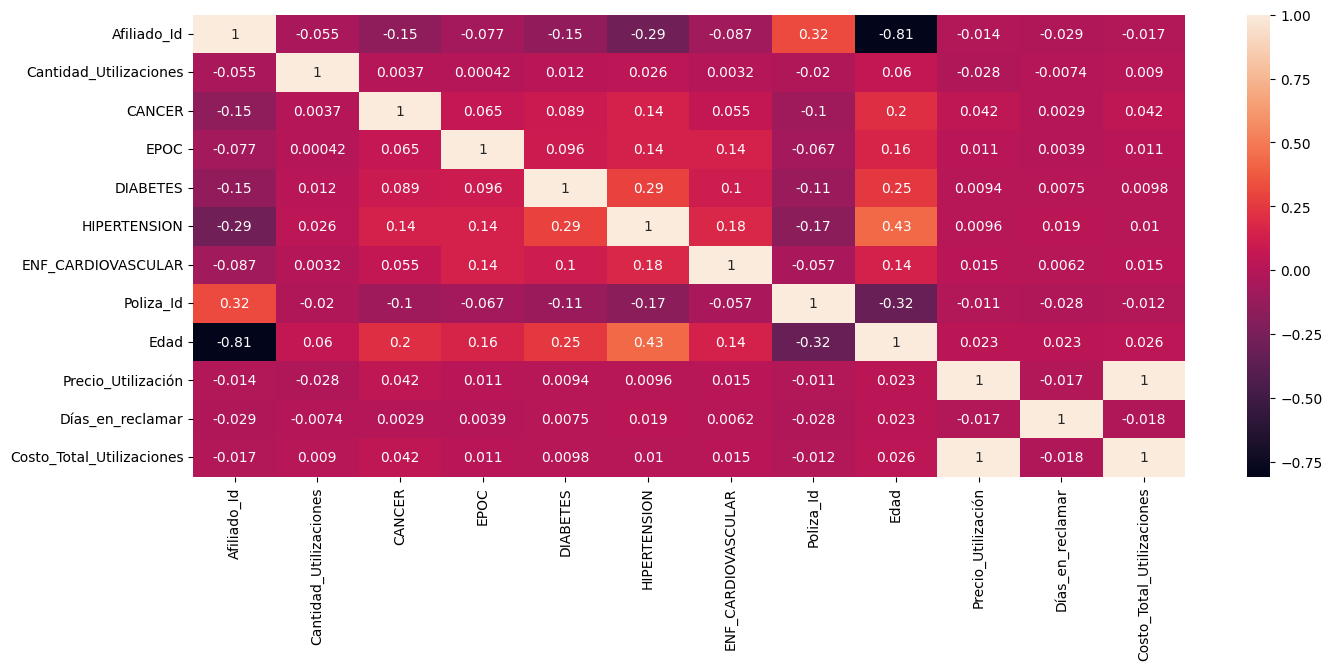

In [8]:
# matriz de correlación y mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Edad

In [50]:
import plotly.express as px

# Supongamos que ya has creado el DataFrame df y la columna rango_edad

# Crear rango de edades
df["Edad"] = df["Edad"].astype(int)
df["rango_edad"] = pd.cut(
    df["Edad"],
    [0, 18, 30, 50, 65, 200],
    labels=["0-18", "19-30", "31-50", "51-65", "65+"],
)

# Agrupar por rango de edad y sexo
df_grouped = (
    df.groupby(["rango_edad", "Sexo"], observed=False)
    .agg({"Cantidad_Utilizaciones": "sum"})
    .reset_index()
    .sort_values("Cantidad_Utilizaciones", ascending=False)
)

# Crear el gráfico de barras
fig = px.bar(
    df_grouped,
    x="rango_edad",
    y="Cantidad_Utilizaciones",
    color="Sexo",
    title="Cantidad de utilizaciones por rango de edad y sexo",
)

# Agregar etiquetas de total y porcentaje
total_por_rango = (
    df_grouped.groupby("rango_edad")["Cantidad_Utilizaciones"].sum().reset_index()
)

for i, row in total_por_rango.iterrows():
    total_label = f'Total: {row["Cantidad_Utilizaciones"]}<br>{row["Cantidad_Utilizaciones"] / df_grouped[df_grouped["rango_edad"] == row["rango_edad"]]["Cantidad_Utilizaciones"].sum() * 100:.2f}%'

    fig.add_annotation(
        x=row["rango_edad"],
        y=row["Cantidad_Utilizaciones"],
        text=total_label,
        showarrow=False,
        xanchor="center",
        yanchor="bottom",
    )

fig.update_layout(
    xaxis_tickangle=-9,
    yaxis=dict(
        title="Cantidad de utilizaciones",
        titlefont_size=16,
        tickfont_size=14,
    ),
)

fig.show()

C:\Users\Diego\AppData\Local\Temp\ipykernel_9892\1326162643.py:32: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [51]:
import plotly.express as px

# Agrupar por rango de edad y sexo
df_grouped = (
    df.groupby(["rango_edad", "Sexo"], observed=False)
    .agg({"Costo_Total_Utilizaciones": "sum"})
    .reset_index()
    .sort_values("Costo_Total_Utilizaciones", ascending=False)
)

# Crear el gráfico de barras
fig = px.bar(
    df_grouped,
    x="rango_edad",
    y="Costo_Total_Utilizaciones",
    color="Sexo",
    title="Costo total de utilizaciones por rango de edad y sexo",
)

# Agregar etiquetas de total y porcentaje
total_por_rango = (
    df_grouped.groupby("rango_edad")["Costo_Total_Utilizaciones"].sum().reset_index()
)

for i, row in total_por_rango.iterrows():
    total_label = f'Total: {row["Costo_Total_Utilizaciones"]:.2f}<br>{row["Costo_Total_Utilizaciones"] / df_grouped[df_grouped["rango_edad"] == row["rango_edad"]]["Costo_Total_Utilizaciones"].sum() * 100:.2f}%'

    fig.add_annotation(
        x=row["rango_edad"],
        y=row["Costo_Total_Utilizaciones"],
        text=total_label,
        showarrow=False,
        xanchor="center",
        yanchor="bottom",
    )

fig.update_layout(
    xaxis_tickangle=-9,
    yaxis=dict(
        title="Costo total de utilizaciones",
        titlefont_size=16,
        tickfont_size=14,
    ),
)

fig.show()

C:\Users\Diego\AppData\Local\Temp\ipykernel_9892\1620024519.py:22: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [52]:
import plotly.express as px

# Frecuencia de cada enfermedad de base en los afiliados
enfermedades = ["CANCER", "EPOC", "DIABETES", "HIPERTENSION", "ENF_CARDIOVASCULAR"]
recuento = [
    sum(df["CANCER"]),
    sum(df["EPOC"]),
    sum(df["DIABETES"]),
    sum(df["HIPERTENSION"]),
    sum(df["ENF_CARDIOVASCULAR"]),
]

# Crear DataFrame para el gráfico
df_frecuencia = pd.DataFrame({"Enfermedad": enfermedades, "Recuento": recuento})

# Agregar rango de edad como color en Plotly
fig = px.bar(
    df_frecuencia,
    x="Enfermedad",
    y="Recuento",
    title="Recuento de enfermedades por rango de edad",
    labels={"x": "Enfermedad", "y": "Recuento"},
)

fig.show()

In [53]:
import plotly.express as px

# Agrupar por rango de edad y enfermedades de base, y calcular la suma de Cantidad_Utilizaciones
df_grouped = (
    df.groupby(["rango_edad", "Enfermedades_de_base"], observed=False)
    .agg({"Cantidad_Utilizaciones": "sum"})
    .reset_index()
    .sort_values("Cantidad_Utilizaciones", ascending=False)
)

# Calcular porcentaje para cada grupo de edad
df_grouped["Porcentaje"] = (
    df_grouped["Cantidad_Utilizaciones"]
    / df_grouped.groupby("rango_edad")["Cantidad_Utilizaciones"].transform("sum")
    * 100
)

# Crear el gráfico de barras apiladas en porcentaje
fig = px.bar(
    df_grouped,
    x="rango_edad",
    y="Porcentaje",
    color="Enfermedades_de_base",
    title="Porcentaje de utilizaciones por rango de edad y enfermedades de base",
)

fig.update_layout(
    xaxis_tickangle=-9,
    yaxis=dict(
        title="Porcentaje de utilizaciones",
        titlefont_size=16,
        tickfont_size=14,
    ),
)

fig.show()

C:\Users\Diego\AppData\Local\Temp\ipykernel_9892\3380720403.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# Poliza

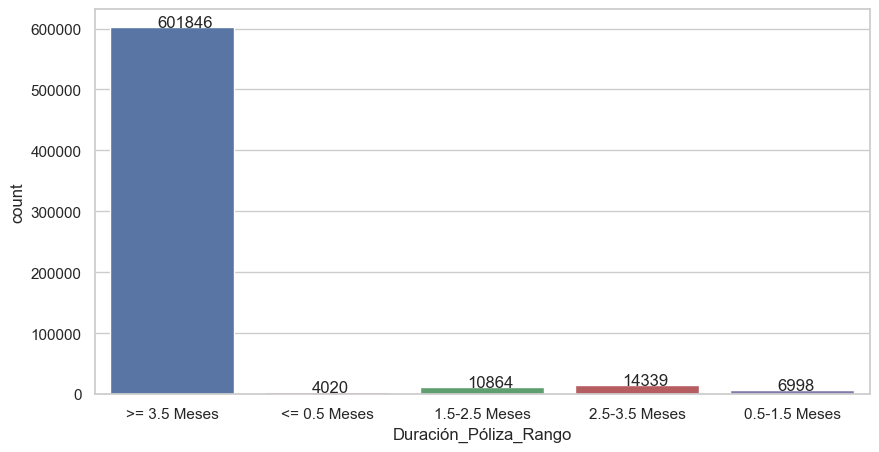

In [18]:
# hacer grafico de barras para la variable 'Duración_Póliza_Rango'

# poner etiquetas sobre las barras
fig = plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Duración_Póliza_Rango", data=df)
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 1))
plt.show()

# Series de tiempo

In [29]:
# Gráfico de series de tiempo por mes para la fecha de reclamación con la cantidad de utilizaciones

df["Fecha_Reclamacion"] = pd.to_datetime(df["Fecha_Reclamacion"])
df["month"] = df["Fecha_Reclamacion"].dt.month
df["year"] = df["Fecha_Reclamacion"].dt.year
df["month_year"] = df["Fecha_Reclamacion"].dt.to_period("M")
df["month_year"] = df["month_year"].astype(str)

import plotly.express as px

fig = px.line(
    df.groupby(["month_year"]).agg({"Cantidad_Utilizaciones": "sum"}).reset_index(),
    x="month_year",
    y="Cantidad_Utilizaciones",
    title="Cantidad de utilizaciones por mes",
)
fig.show()

In [31]:
# Gráfico de series de tiempo con la variable fecha de reclamación y el costo total de utilizaciones

fig = px.line(
    df.groupby(["month_year"]).agg({"Costo_Total_Utilizaciones": "sum"}).reset_index(),
    x="month_year",
    y="Costo_Total_Utilizaciones",
    title="Costo total de utilizaciones por mes",
)
fig.show()